# Follow-Along Activity

Saving 14_basic_algorithmic_trading.csv to 14_basic_algorithmic_trading.csv
Train Accuracy: 0.53
Test Accuracy: 0.51


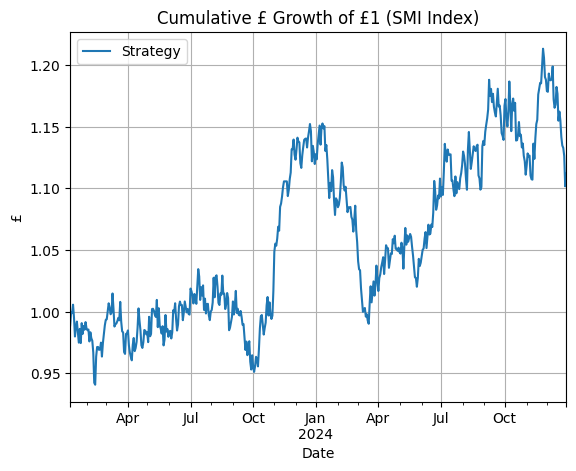

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Step 2: Load synthetic stock data for the SMI Index
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("14_basic_algorithmic_trading.csv", parse_dates=["Date"], index_col="Date")
price_col = "price"
data = data[[price_col]].rename(columns={price_col: "price"})


# Step 3: Compute the Relative Strength Index (RSI)
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["rsi"] = compute_rsi(data["price"])


# Step 4: Create target variable (1 if next day's return is positive, otherwise 0)
data["return"] = data["price"].pct_change()
data["target"] = (data["return"].shift(-1) > 0).astype(int)


# Step 5: Drop missing values
data = data.dropna()


# Step 6: Prepare features and labels
X = data[["rsi"]]
y = data["target"]


# Step 7: Split into training and testing sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Step 8: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Accuracy:", round(train_score, 2))
print("Test Accuracy:", round(test_score, 2))


# Step 9: Simulate trading strategy
predictions = model.predict(X_test)
signals = pd.Series(predictions, index=X_test.index)

next_day_return = data["return"].shift(-1)
strategy_returns = next_day_return.loc[signals.index] * signals
strategy_returns = strategy_returns.dropna()


# Plot cumulative returns
(1 + strategy_returns).cumprod().plot(label="Strategy")
plt.title("Cumulative £ Growth of £1 (SMI Index)")
plt.legend()
plt.grid(True)
plt.ylabel("£")

# Save to JPEG for textbook publication
plt.savefig("Figure 14.8 Cumulative Growth.jpeg", dpi=300, bbox_inches="tight")

plt.show()


# Your Project

In [3]:
def compute_macd(price, short=12, long=26):
    ema_short = price.ewm(span=short, adjust=False).mean()
    ema_long = price.ewm(span=long, adjust=False).mean()
    return ema_short - ema_long

data["macd"] = compute_macd(data["price"])

X = data[["macd"]]


Train Accuracy: 0.53
Test Accuracy: 0.5


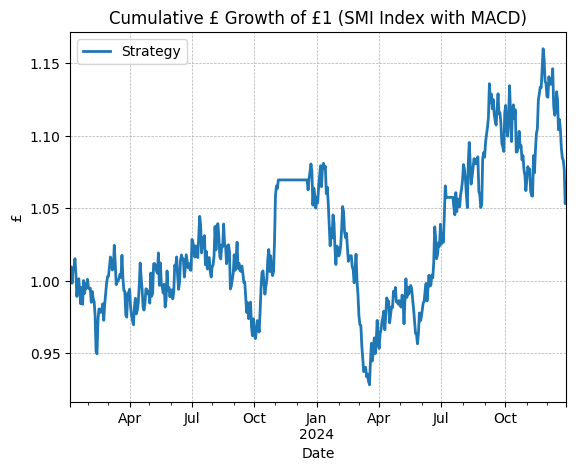

In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Step 2: Load synthetic price data for the SMI Index
data = pd.read_csv("14_basic_algorithmic_trading.csv", parse_dates=["Date"], index_col="Date")
price_col = "price"
data = data[[price_col]].rename(columns={price_col: "price"})


# Step 3: Compute the Moving Average Convergence Divergence (MACD)
def compute_macd(price, short=12, long=26):
    ema_short = price.ewm(span=short, adjust=False).mean()
    ema_long = price.ewm(span=long, adjust=False).mean()
    return ema_short - ema_long

data["macd"] = compute_macd(data["price"])


# Step 4: Create target variable (1 if next day's return is positive, otherwise 0)
data["return"] = data["price"].pct_change()
data["target"] = (data["return"].shift(-1) > 0).astype(int)


# Step 5: Drop missing values
data = data.dropna()


# Step 6: Prepare features and labels
X = data[["macd"]]
y = data["target"]


# Step 7: Split into training and testing sets (no shuffle to preserve time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Step 8: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Accuracy:", round(train_score, 2))
print("Test Accuracy:", round(test_score, 2))


# Step 9: Simulate trading strategy
predictions = model.predict(X_test)
signals = pd.Series(predictions, index=X_test.index)

next_day_return = data["return"].shift(-1)
strategy_returns = next_day_return.loc[signals.index] * signals
strategy_returns = strategy_returns.dropna()


# Step 10: Plot cumulative returns
(1 + strategy_returns).cumprod().plot(label="Strategy", linewidth=2)
plt.title("Cumulative £ Growth of £1 (SMI Index with MACD)")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.ylabel("£")

# Save figure for publication
plt.savefig("Figure 14.9 Cumulative Growth (SMI Index MACD).jpeg", dpi=300, bbox_inches="tight")

plt.show()
